# Imports and Functions

In [1]:
from sunlab.environment.base.cpu import *
from sunlab.environment.base.extras import *
from sunlab.globals import FILES
from sunlab.sunflow import *

# Runtime Parameters

In [2]:
SAVE_EXTRAS = False

In [3]:
g_Base = lambda *args: DIR_ROOT + "Figures/"
g_Iterations = 100

# Setup

In [4]:
model, dataset = load_aae_and_dataset(FILES['TRAINING_DATASET'], FILES['PRETRAINED_MODEL_DIR'], MaxAbsScaler)

In [5]:
input_dataset_mfv = dataset.dataset
output_dataset_mfv = np.zeros((g_Iterations+1, *input_dataset_mfv.shape))
output_dataset_mfv[0,...] = input_dataset_mfv
output_time = np.zeros((g_Iterations+1, input_dataset_mfv.shape[0]))
for iteration in range(g_Iterations):
    iteration_n = iteration + 1
    output_dataset_mfv[iteration_n,...] = model.autoencoder(output_dataset_mfv[iteration,...]).numpy()
    output_time[iteration_n,...] = iteration_n
output_dataset_mlv = model.encoder(output_dataset_mfv).numpy()

# Plots

In [ ]:
# https://arxiv.org/pdf/2106.16239

import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure()

def updatefig(i):
    fig.clear()
    plt.scatter2d(output_dataset_mlv[i%(g_Iterations+1),...], s=1)
    plt.apply_boundary()
    plt.draw()

anim = animation.FuncAnimation(fig, updatefig, g_Iterations+1)
anim.save(g_Base() + "../../IterationTest.gif", fps=10)

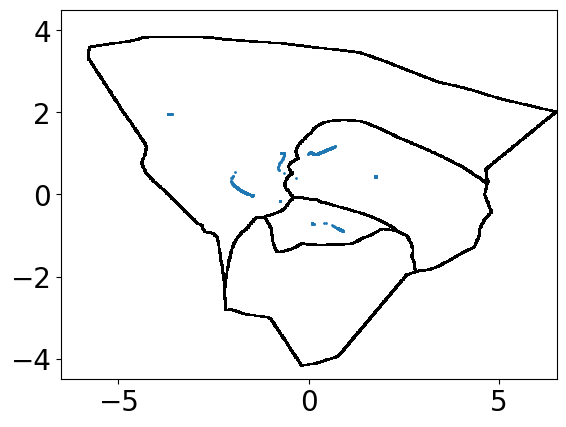

In [6]:
plt.scatter2d(output_dataset_mlv[-1,...], s=1)
plt.apply_boundary()

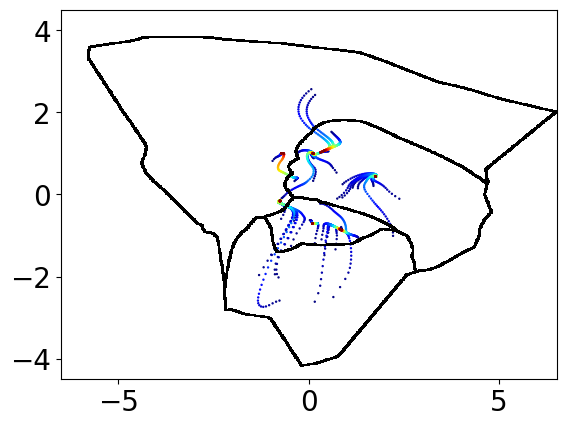

In [7]:
_N = 10
_M = 50
plt.scatter(output_dataset_mlv[:,_N:_M,0].flatten(),output_dataset_mlv[:,_N:_M,1].flatten(), c=output_time[:,_N:_M].flatten(), cmap='jet', s=0.5)
plt.apply_boundary()

In [38]:
from sklearn.cluster import KMeans

In [21]:
plt.apply_boundary()
extent=(*plt.xlim(),*plt.ylim(),)
plt.clf()

<Figure size 640x480 with 0 Axes>

In [90]:
_N = 300

XY = np.mgrid[extent[0]:extent[1]:0.1,extent[2]:extent[3]:0.1]
XY = XY.transpose(1,2,0)
XY_shape = XY.shape
XY = XY.reshape((-1,2))
MLVs = [XY[np.newaxis,...],]
MFV = model.decoder(XY).numpy()[np.newaxis,...]
for i in range(_N):
    MLVs.append(model.encoder(MFV[0,...]).numpy()[np.newaxis,...])
    MFV = model.decoder(MLVs[-1]).numpy()
MLVs = np.vstack(MLVs)
MLVs.shape

(301, 11921, 2)

In [92]:
k_model = KMeans()
MLV_class = k_model.fit_predict(MLVs[-1,...])

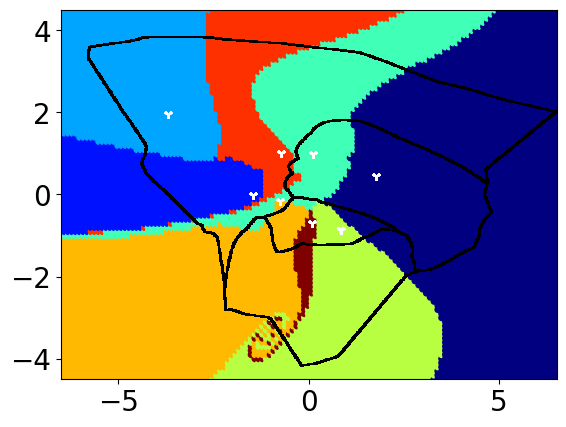

In [94]:
plt.scatter2d(MLVs[0,...], s=16, c=MLV_class, cmap='jet')
plt.apply_boundary()
plt.scatter(MLVs[-1,:,0], MLVs[-1,:,1], marker='x', c='white')

# END